<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/deep-learning-from-scratch/01_foundations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

In [59]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
%matplotlib inline

from typing import Callable
from typing import Dict
from typing import List

In [60]:
np.set_printoptions(precision=4)

##Basic functions

In [61]:
def square(x: ndarray) -> ndarray:
  """Square each element in the input ndarray."""
  return np.power(x, 2)

def leaky_relu(x: ndarray) -> ndarray:
  """Apply "Leaky ReLU" function to each element in ndarray"""
  return np.maximum(0.2 * x, x)

def sigmoid(x: ndarray) -> ndarray:
  '''Apply "sigmoid" function to each element in ndarray'''
  return 1 / (1 + np.exp(-x))

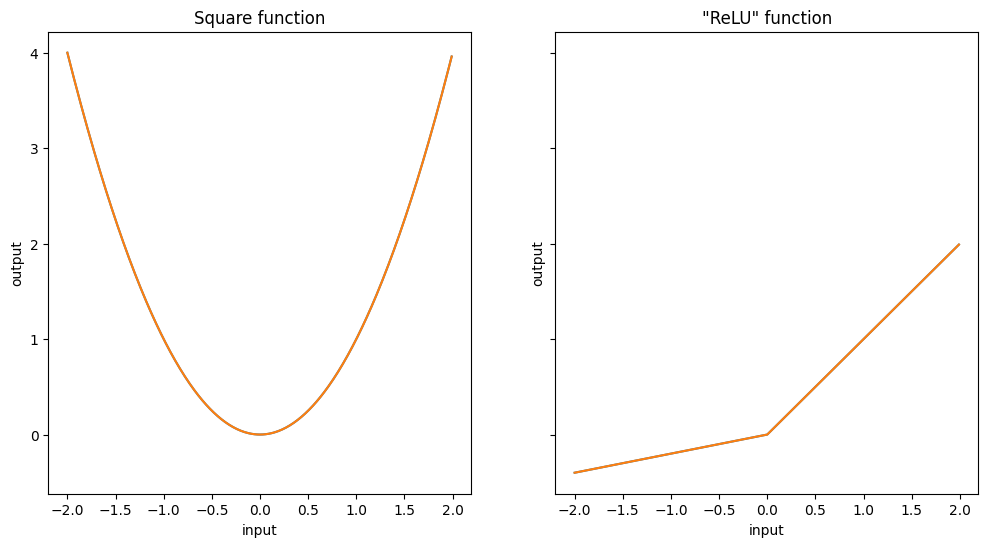

In [62]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 6))  # 2 Rows, 1 Col

input_range = np.arange(-2, 2, 0.01)
ax[0].plot(input_range, square(input_range))
ax[0].plot(input_range, square(input_range))
ax[0].set_title('Square function')
ax[0].set_xlabel('input')
ax[0].set_ylabel('output')

ax[1].plot(input_range, leaky_relu(input_range))
ax[1].plot(input_range, leaky_relu(input_range))
ax[1].set_title('"ReLU" function')
ax[1].set_xlabel('input')
ax[1].set_ylabel('output');

##Derivatives

First, we’ll get mathematically precise: we can describe this number—how much the output of $f$ changes as we change its input at a particular value $a$ of the input—as a limit:

$$ \frac{df}{dx}(a) =
\lim_{\Delta \to 0} \frac{{f \left( {a + \Delta } \right) - f\left( a - \Delta \right)}}{2 * \Delta } $$

$$ \frac =
\lim_{\Delta \to 0} \frac{{f \left( {a + \Delta } \right) - f\left( a - \Delta \right)}}{2 * \Delta } $$

In [63]:
def derivative(func: Callable[[ndarray], ndarray], x: ndarray, delta: float=0.001) -> ndarray:
  """Evaluates the derivative of a function "func" at every element in the "x" array."""
  return (func(x + delta) - func(x - delta)) / (2 * delta)

##Nested Functions

$$y=f_2(f_1(x))$$

In [64]:
# A Function takes in an ndarray as an argument and produces an ndarray
array_func = Callable[[ndarray], ndarray]

# A Chain is a list of functions
Chain = List[array_func]

In [65]:
def chain_func(chain: Chain, x: ndarray) -> ndarray:
  """Evaluates two functions in a row, in a "Chain"."""

  f1 = chain[0]
  f2 = chain[1]

  return f2(f1(x))

##Chain Rule

$$ \frac{df_2}{dx}(x) = \frac{df_2}{du}(f_1(x)) * \frac{df_1}{dx}(x) $$

In [66]:
def sigmoid(x: ndarray) -> ndarray:
  """Apply the sigmoid function to each element in the input ndarray."""
  return 1 / (1 + np.exp(-x))

In [67]:
def chain_rule(chain: Chain, x: ndarray) -> ndarray:
  """Uses the chain rule to compute the derivative of two nested functions"""

  assert len(chain) == 2, "This function requires 'Chain' objects of length 2"

  assert x.ndim == 1, "Function requires a 1 dimensional ndarray as input"

  f1 = chain[0]
  f2 = chain[1]

  # df1/dx
  f1_of_x = f1(x)

  # df1/du
  df1_dx = derivative(f1, x)

  # df2/du(f1(x))
  df2_du = derivative(f2, f1(x))

  # Multiplying these quantities together at each point
  return df2_du * df1_dx

In [68]:
def plot_chain_rule(ax, chain: Chain, x: ndarray) -> None:
  assert x.ndim == 1, "Function requires a 1 dimensional ndarray as input"

  output = chain_func(chain, x)
  ax.plot(x, output)

In [69]:
def plot_chain_rule_derivative(ax, chain: Chain, x: ndarray) -> ndarray:
  output = chain_rule(chain, x)
  ax.plot(x, output)

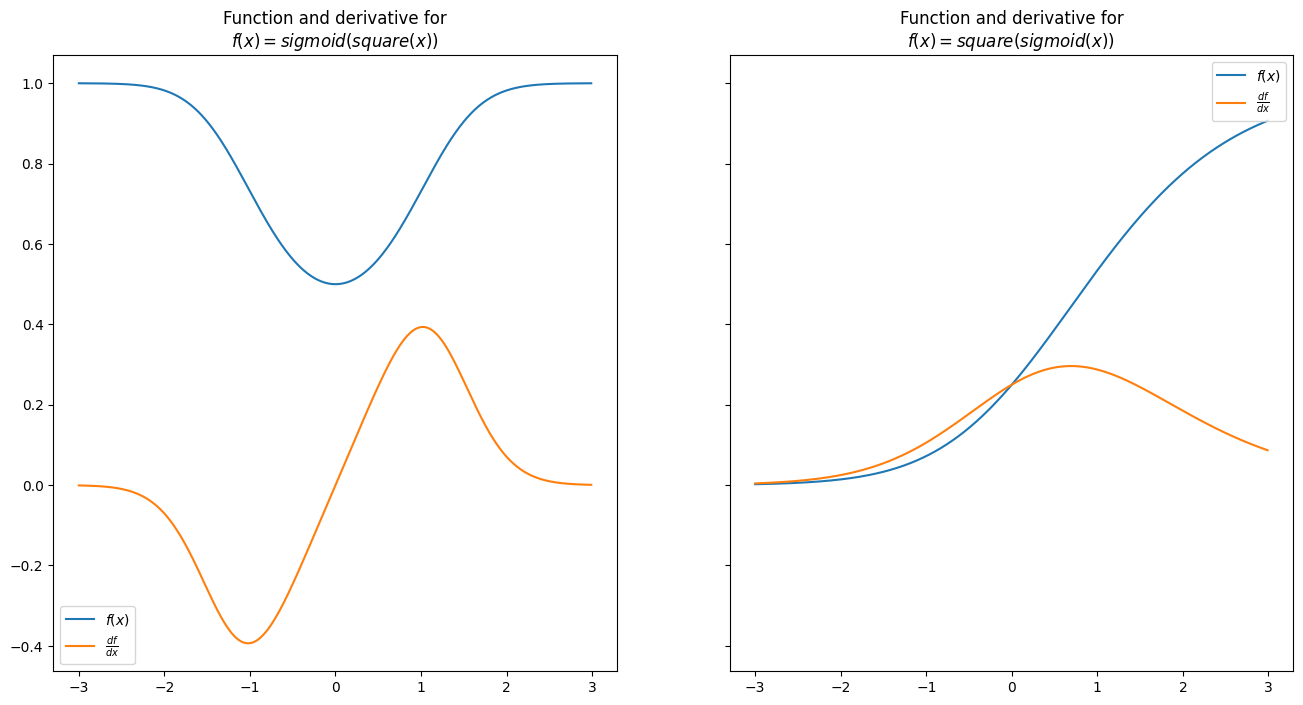

In [70]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain_rule(ax[0], chain_1, PLOT_RANGE)
plot_chain_rule_derivative(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(x))$")

plot_chain_rule(ax[1], chain_2, PLOT_RANGE)
plot_chain_rule_derivative(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(x))$");

##A Slightly Longer Example

Let’s closely examine a slightly longer chain: if we have three mostly differentiable functions—$f_1, f_2,$ and $f_3$—how would we go about computing the derivative of $f_1, f_2, f_3$?

$$ \frac{df_3}{dx}(x) = \frac{df_3}{dv}(f_2(f_1(x))) * \frac{df_2}{du}(f_1(x)) * \frac{df_1}{dx}(x) $$



In [71]:
def chain_rule_3(chain: Chain, X: ndarray) -> ndarray:
  """Uses the chain rule to compute the derivative of three nested functions"""

  assert len(chain) == 3, "This function requires 'Chain' objects of length 3"

  f1 = chain[0]
  f2 = chain[1]
  f3 = chain[2]

  # f1(x)
  f1_of_x = f1(X)

  # f2(f1(x))
  f2_of_x = f2(f1_of_x)

  # df3du
  df3du = derivative(f3, f2_of_x)

  # df2du
  df2du = derivative(f2, f1_of_x)

  # df1dx
  df1dx = derivative(f1, X)

  # Multiplying these quantities together at each point
  return df1dx * df2du * df3du

In [72]:
def chain_func_3(chain: Chain, x: ndarray) -> ndarray:
  """Evaluates two functions in a row, in a "Chain"."""
  assert len(chain) == 3, "Length of input 'chain' should be 3"
  f1 = chain[0]
  f2 = chain[1]
  f3 = chain[2]

  return f3(f2(f1(x)))

In [73]:
def plot_chain_rule(ax, chain: Chain, x: ndarray) -> None:
  assert x.ndim == 1, "Function requires a 1 dimensional ndarray as input"

  output = chain_func_3(chain, x)
  ax.plot(x, output)

def plot_chain_rule_derivative(ax, chain: Chain, x: ndarray) -> ndarray:
  output = chain_rule_3(chain, x)
  ax.plot(x, output)

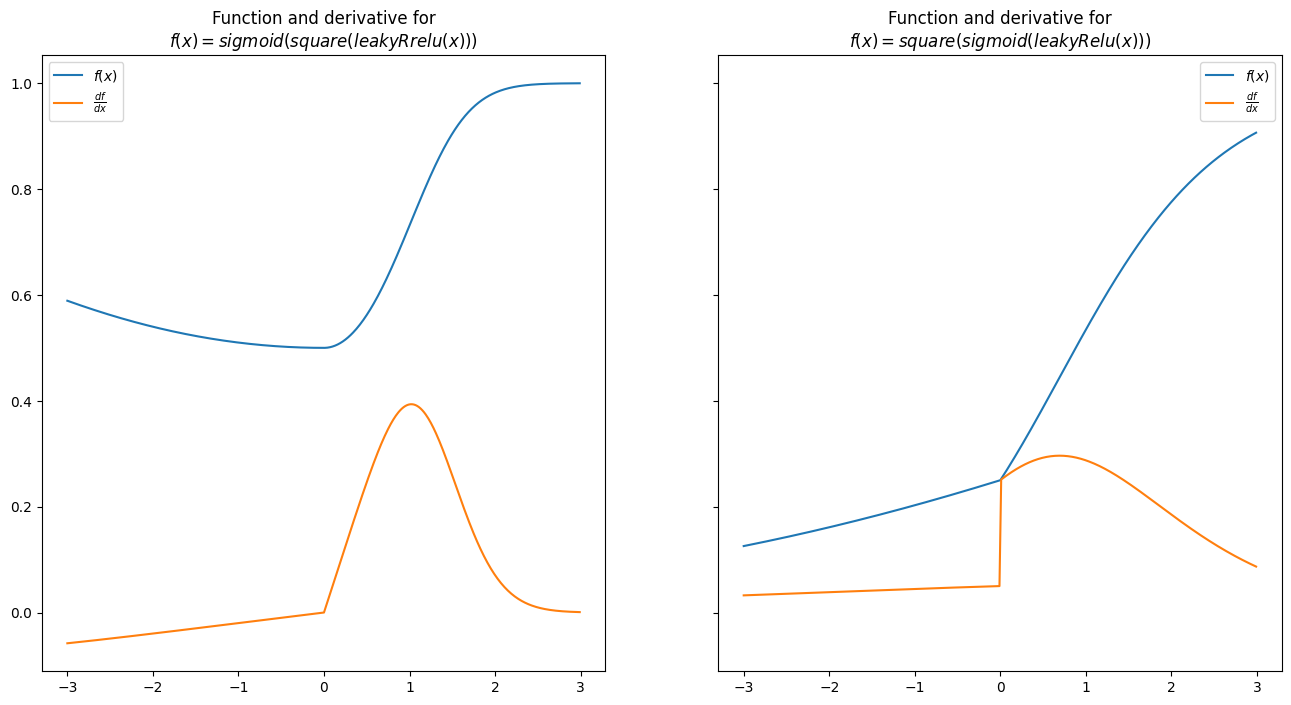

In [74]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16, 8))  # 2 Rows, 1 Col

chain_1 = [leaky_relu, square, sigmoid]
chain_2 = [leaky_relu, sigmoid, square]

PLOT_RANGE = np.arange(-3, 3, 0.01)
plot_chain_rule(ax[0], chain_1, PLOT_RANGE)
plot_chain_rule_derivative(ax[0], chain_1, PLOT_RANGE)

ax[0].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[0].set_title("Function and derivative for\n$f(x) = sigmoid(square(leakyRrelu(x)))$")

plot_chain_rule(ax[1], chain_2, PLOT_RANGE)
plot_chain_rule_derivative(ax[1], chain_2, PLOT_RANGE)
ax[1].legend(["$f(x)$", "$\\frac{df}{dx}$"])
ax[1].set_title("Function and derivative for\n$f(x) = square(sigmoid(leakyRelu(x)))$");

##Multiple Input Functions